# Dementia Prediction Dataset


## Classification & Prediction of Dementia

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the dataset
df = pd.read_csv('../input/dementia-prediction-dataset/dementia_dataset.csv')

In [3]:
df.head() # First five rows

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


## Exploratory Data Analysis

In [4]:
# Renaming the variables to something that convey meaning
df.rename(columns={'M/F':'Gender','MR Delay':'MR_Delay', 'Hand':'Handedness', 'EDUC':'Years_of_Edu',
         'SES':'Socioeconomic_Status', 'MMSE':'Mini_Mental_State_Exam',
         'CDR':'Clinical_Dementia_Rating', 'eTIV':'Estimated_total_intracranial_volume',
        'nWBV':'Normalized_whole_brain_volume', 'ASF':'Atlas_scaling_factor'}, 
      inplace=True)

# https://www.kaggle.com/sid321axn/eda-for-predicting-dementia

In [5]:
df.info() # Information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Subject ID                           373 non-null    object 
 1   MRI ID                               373 non-null    object 
 2   Group                                373 non-null    object 
 3   Visit                                373 non-null    int64  
 4   MR_Delay                             373 non-null    int64  
 5   Gender                               373 non-null    object 
 6   Handedness                           373 non-null    object 
 7   Age                                  373 non-null    int64  
 8   Years_of_Edu                         373 non-null    int64  
 9   Socioeconomic_Status                 354 non-null    float64
 10  Mini_Mental_State_Exam               371 non-null    float64
 11  Clinical_Dementia_Rating        

There are 373 observations and 15 columns

Two columns have missing values

There are object, float and integer data types

In [6]:
df.describe().T # Statistical Description

,count,mean,std,min,25%,50%,75%,max
Visit,373.0,1.882038,0.922843,1.000,1.000,2.000,2.000,5.000
MR_Delay,373.0,595.104558,635.485118,0.000,0.000,552.000,873.000,2639.000
Age,373.0,77.013405,7.640957,60.000,71.000,77.000,82.000,98.000
Years_of_Edu,373.0,14.597855,2.876339,6.000,12.000,15.000,16.000,23.000
Socioeconomic_Status,354.0,2.460452,1.134005,1.000,2.000,2.000,3.000,5.000
Mini_Mental_State_Exam,371.0,27.342318,3.683244,4.000,27.000,29.000,30.000,30.000
Clinical_Dementia_Rating,373.0,0.290885,0.374557,0.000,0.000,0.000,0.500,2.000
Estimated_total_intracranial_volume,373.0,1488.128686,176.139286,1106.000,1357.000,1470.000,1597.000,2004.000
Normalized_whole_brain_volume,373.0,0.729568,0.037135,0.644,0.700,0.729,0.756,0.837
Atlas_scaling_factor,373.0,1.195461,0.138092,0.876,1.099,1.194,1.293,1.587


In [7]:
df.nunique()

Subject ID                             150
MRI ID                                 373
Group                                    3
Visit                                    5
MR_Delay                               201
Gender                                   2
Handedness                               1
Age                                     39
Years_of_Edu                            12
Socioeconomic_Status                     5
Mini_Mental_State_Exam                  18
Clinical_Dementia_Rating                 4
Estimated_total_intracranial_volume    286
Normalized_whole_brain_volume          136
Atlas_scaling_factor                   265
dtype: int64

Count of unique values in each column

In [8]:
# df.drop('Hand', axis=1, inplace=True)

<AxesSubplot:xlabel='Atlas_scaling_factor', ylabel='Count'>

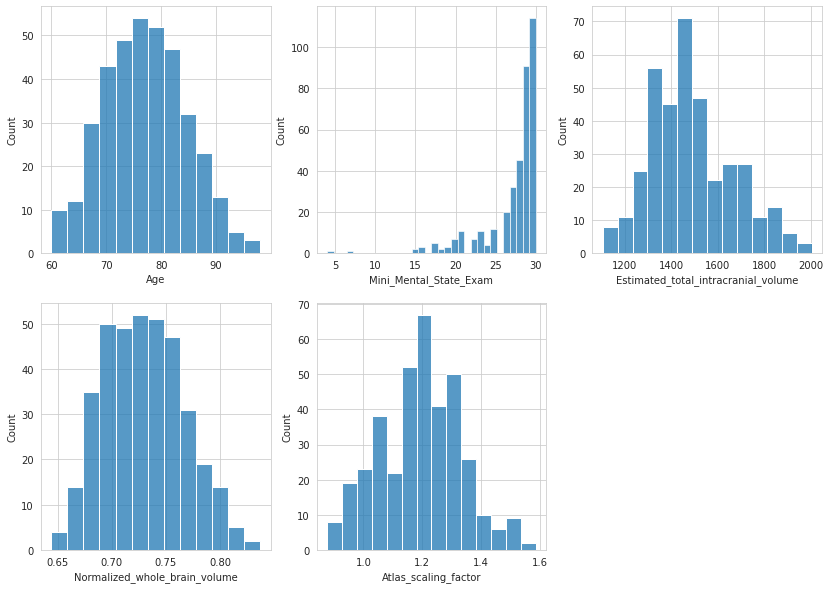

In [9]:
# Histogram Distribution for continuous variables

plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.histplot(x='Age',data=df)
plt.subplot(2,3,2)
sns.histplot(x='Mini_Mental_State_Exam',data=df)
plt.subplot(2,3,3)
sns.histplot(x='Estimated_total_intracranial_volume',data=df)
plt.subplot(2,3,4)
sns.histplot(x='Normalized_whole_brain_volume',data=df)
plt.subplot(2,3,5)
sns.histplot(x='Atlas_scaling_factor',data=df)

The five continuous-numerical variables seem to follow normal distribution except the Mini_Mental_State_Exam column

<AxesSubplot:xlabel='Atlas_scaling_factor'>

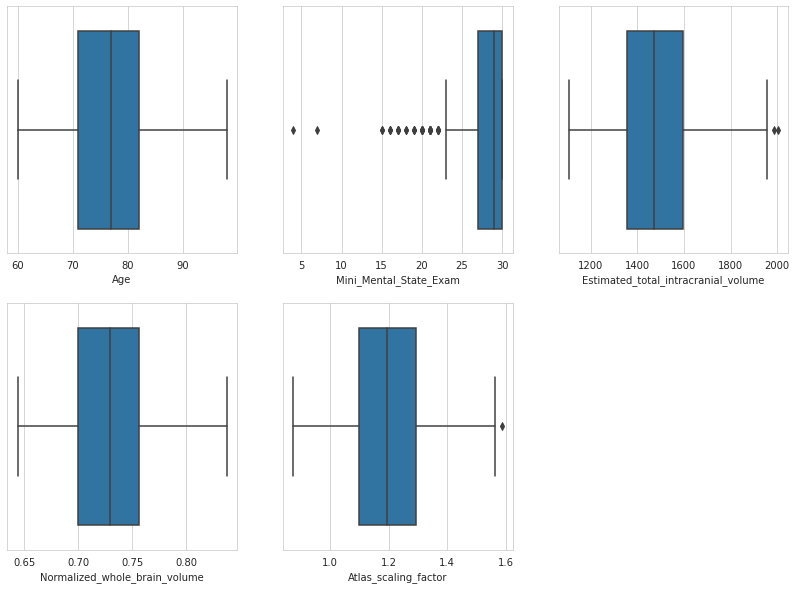

In [10]:
# Boxplot Distribution for continuous variables

plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='Age',data=df)
plt.subplot(2,3,2)
sns.boxplot(x='Mini_Mental_State_Exam',data=df)
plt.subplot(2,3,3)
sns.boxplot(x='Estimated_total_intracranial_volume',data=df)
plt.subplot(2,3,4)
sns.boxplot(x='Normalized_whole_brain_volume',data=df)
plt.subplot(2,3,5)
sns.boxplot(x='Atlas_scaling_factor',data=df)

Three of the continuous-numerical variables have a few extreme values (possible outliers) that need to be examined.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Subject ID                           373 non-null    object 
 1   MRI ID                               373 non-null    object 
 2   Group                                373 non-null    object 
 3   Visit                                373 non-null    int64  
 4   MR_Delay                             373 non-null    int64  
 5   Gender                               373 non-null    object 
 6   Handedness                           373 non-null    object 
 7   Age                                  373 non-null    int64  
 8   Years_of_Edu                         373 non-null    int64  
 9   Socioeconomic_Status                 354 non-null    float64
 10  Mini_Mental_State_Exam               371 non-null    float64
 11  Clinical_Dementia_Rating        

In [12]:
df.Years_of_Edu.dtype

dtype('int64')

Nondemented    190
Demented       146
Converted       37
Name: Group, dtype: int64


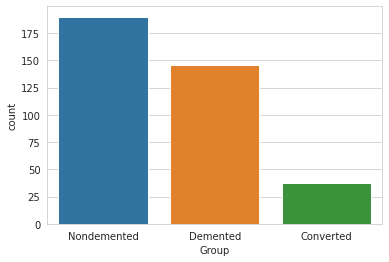

F    213
M    160
Name: Gender, dtype: int64


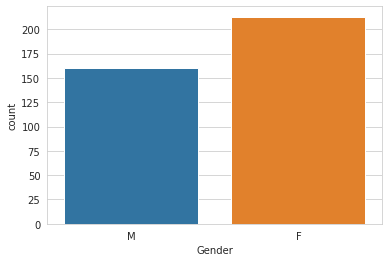

R    373
Name: Handedness, dtype: int64


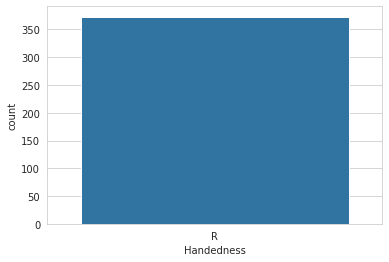

In [13]:
cat_feat =[column for column in df.columns if df[column].dtypes=='O']
cat_feat.remove('Subject ID')
cat_feat.remove('MRI ID')
for feat in cat_feat:
    print(df[feat].value_counts())
    sns.countplot(df[feat])
    plt.show()

Group has 3 unique values

Gender has 2 unique values

All observations are right-handed, the column needs to be removed (one unique value).

In [14]:
df.nunique()

Subject ID                             150
MRI ID                                 373
Group                                    3
Visit                                    5
MR_Delay                               201
Gender                                   2
Handedness                               1
Age                                     39
Years_of_Edu                            12
Socioeconomic_Status                     5
Mini_Mental_State_Exam                  18
Clinical_Dementia_Rating                 4
Estimated_total_intracranial_volume    286
Normalized_whole_brain_volume          136
Atlas_scaling_factor                   265
dtype: int64

12    103
16     81
18     64
14     33
13     27
15     17
20     13
11     11
8       9
17      9
6       3
23      3
Name: Years_of_Edu, dtype: int64


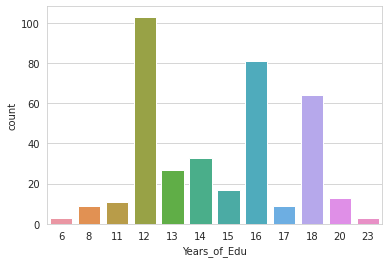

2.0    103
1.0     88
3.0     82
4.0     74
5.0      7
Name: Socioeconomic_Status, dtype: int64


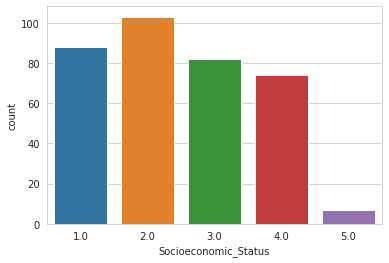

0.0    206
0.5    123
1.0     41
2.0      3
Name: Clinical_Dementia_Rating, dtype: int64


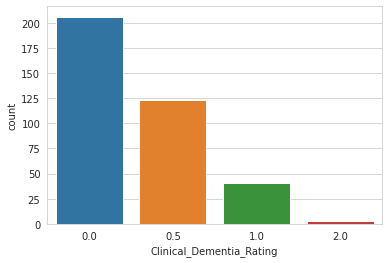

1    150
2    144
3     58
4     15
5      6
Name: Visit, dtype: int64


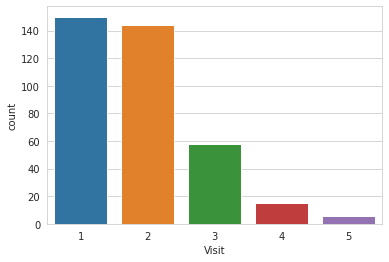

In [15]:
ordinal =['Years_of_Edu', 'Socioeconomic_Status', 'Clinical_Dementia_Rating', 'Visit']
for feat in ordinal:
    print(df[feat].value_counts())
    sns.countplot(df[feat])
    plt.show()

## Bi/Multi-variate Analysis

<AxesSubplot:xlabel='Group', ylabel='MR_Delay'>

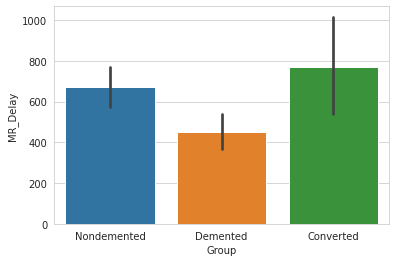

In [16]:
sns.barplot(df.Group, df.MR_Delay)

Converted has the highest MR delay, then nondemented, follow by demented

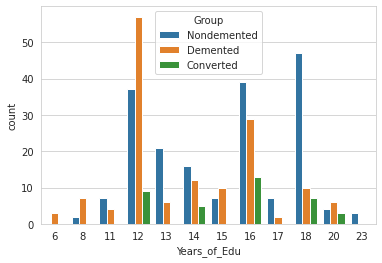

In [17]:
sns.countplot(df.Years_of_Edu, hue=df.Group);

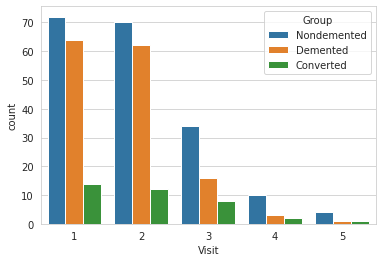

In [18]:
sns.countplot(df.Visit, hue=df.Group);

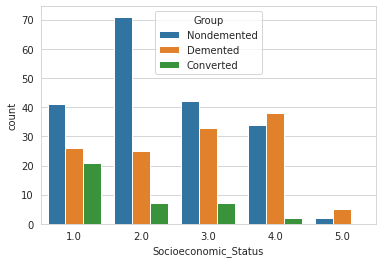

In [19]:
sns.countplot(df.Socioeconomic_Status, hue=df.Group);

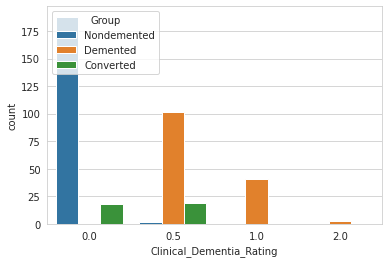

In [20]:
sns.countplot(df.Clinical_Dementia_Rating, hue=df.Group);

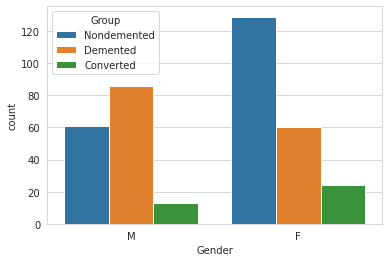

In [21]:
sns.countplot(df.Gender, hue=df.Group);

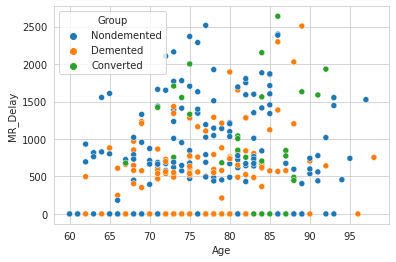

In [22]:
sns.scatterplot(df.Age, df.MR_Delay, hue=df.Group);